# EDA  NYC-Trip Duration Problem Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

# importing data and loading to "data"

# Here is the description of all the variables / features available in the dataset which will help you to perform EDA:  
id - a unique identifier for each trip  
vendor_id - a code indicating the provider associated with the trip record  
pickup_datetime - date and time when the meter was engaged  
dropoff_datetime - date and time when the meter was disengaged  
passenger_count - the number of passengers in the vehicle (driver entered value)  
pickup_longitude - the longitude where the meter was engaged  
pickup_latitude - the latitude where the meter was engaged  
dropoff_longitude - the longitude where the meter was disengaged  
dropoff_latitude - the latitude where the meter was disengaged  
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)  
trip_duration - (target) duration of the trip in seconds  

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [3]:
data.shape

(729322, 11)

In [4]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [7]:
non_num_cols=['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(data[non_num_cols].count())

id                    729322
pickup_datetime       729322
dropoff_datetime      729322
store_and_fwd_flag    729322
dtype: int64


pickup_datetime and dropoff_datetime are being converted to datetime format which makes analysis of date and time data much more easier for me.

In [8]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

# Univariate Analysis
Passenger Count

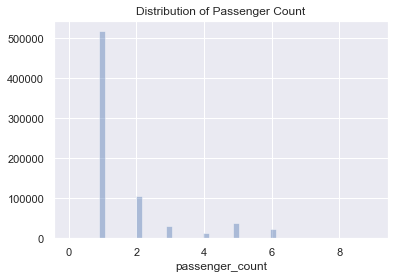

In [9]:
sns.distplot(data['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

Here we see that the mostly very few passengers avail the cab. The instance of large group of people travelling together is rare.

# Distribution of Pickup and Drop Off day of the week

In [10]:
data['pickup_datetime'].nunique()

709359

In [11]:
data['dropoff_datetime'].nunique()

709308

# converting these dates into days of the week

In [12]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

# Distribution of the different days of week

In [13]:
data['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64

In [14]:
data['dropoff_day'].value_counts()

Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: dropoff_day, dtype: int64

#  Distribution of days of the week graphically

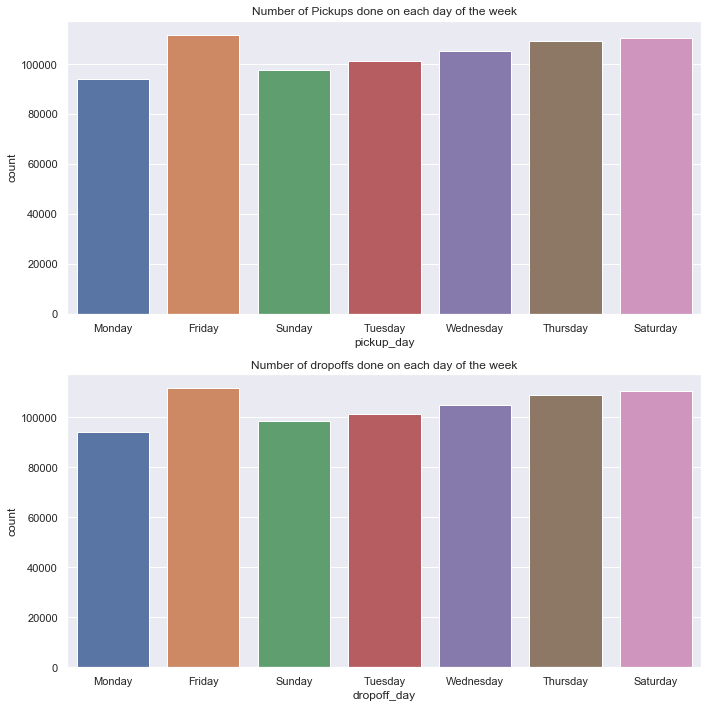

In [15]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=data,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=data,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

# Distribution of Pickup and Drop Off hours of the day  
divide the times into 4 time zones:
morning (4 hrs to 10 hrs) ,  
midday (10 hrs to 16 hrs) ,  
evening (16 hrs to 22 hrs) and  
late night (22 hrs to 4 hrs)  

In [16]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
data['pickup_timezone']=data['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))
data['dropoff_timezone']=data['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))

# distribution of the timezones

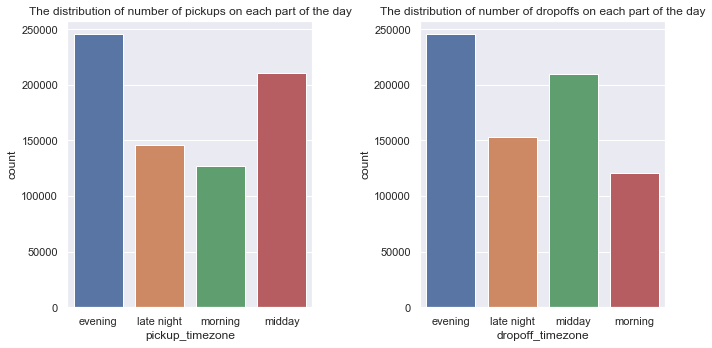

In [17]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=data,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=data,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

As we see above that most pickups and drops occur in the evening. While the least drops and pickups occur during morning

# Hour of the day when the pickup and dropoff was done

Text(0.5, 1.0, 'Distribution of dropoff hours')

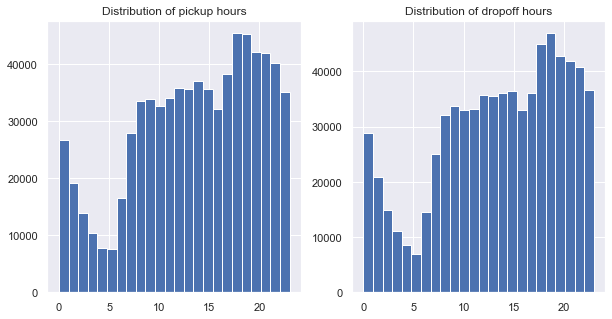

In [18]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
data['pickup_hour']=data['pickup_datetime'].dt.hour
data.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

Both distributions are almost similar and are also aligned with the division of the hours of the day into 4 parts and their distribution done previously.

# Distribution of the stored and forward flag

In [19]:
data['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

# Distribution of the trip duration

Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

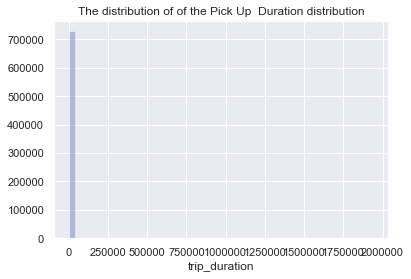

In [20]:
sns.distplot(data['trip_duration'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')

Above histogram shows extreme right skewness, hence there are outliers. Lets see the boxplot of this variable.

Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

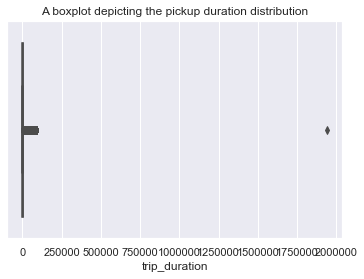

In [21]:
sns.boxplot(data['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

As we see there above boxplot is only value near 2000000 while all the others are somewhere between 0 and 100000. The one near 2000000 is definitely an outlier which must be treated

# Fetching 10 largest value of trip_duration.

In [22]:
print( data['trip_duration'].nlargest(10))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64


The largest value is much greater than the 2nd and 3rd largest trip duration value. This might be because of some errors which typically occurs during data collection or this might be a legit data. Since the occurrence of such a huge value is unlikely so its better to drop this row before further analysis.

In [23]:
data=data[data.trip_duration!=data.trip_duration.max()]

# The distribution of the trip_duration after we have dropped the outlier

Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

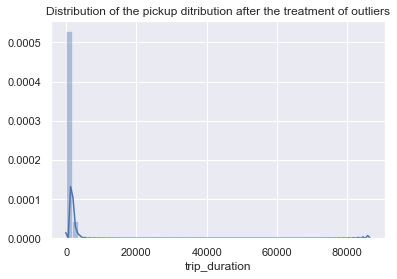

In [24]:
sns.distplot(data['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')

Still there is an extreme right skewness. Thus we will divide the trip_duration column into some interval.
  
    
The intervals are :  
less than 5 hours  
5–10 hours  
10–15 hours  
15–20 hours  
more than 20 hours  

In [25]:
bins=np.array([0,1800,3600,5400,7200,90000])
data['duration_time']=pd.cut(data.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

# Distribution of pickup longitude

Text(0.5, 1.0, 'The distribution of Pick up Longitude')

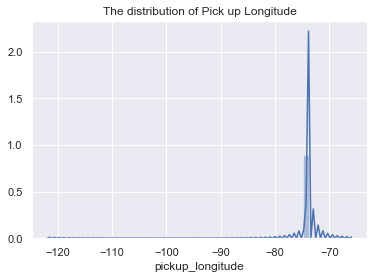

In [26]:
sns.distplot(data['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

# Distribution of drop off longitude

Text(0.5, 1.0, 'The distribution of Drop off Longitude')

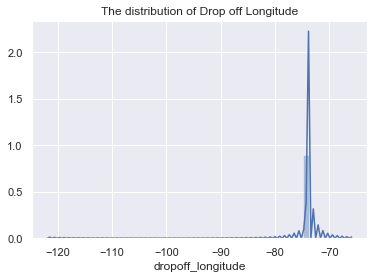

In [27]:
sns.distplot(data['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')

# Distribution of dropoff latitude

Text(0.5, 1.0, 'The distribution of drop off Latitude')

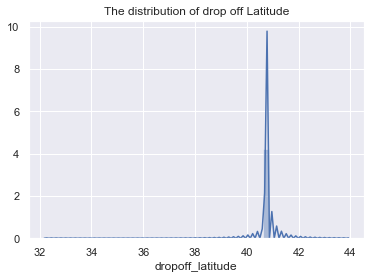

In [28]:
sns.distplot(data['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')

# Distribution of pickup latitude

Text(0.5, 1.0, 'The distribution of pick up Latitude')

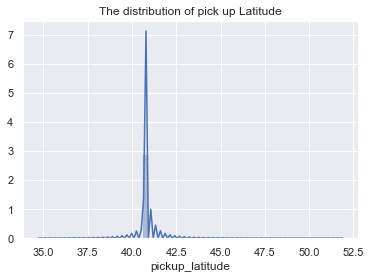

In [29]:
sns.distplot(data['pickup_latitude'])
plt.title('The distribution of pick up Latitude')

As, We see that the pickup longitude and the dropoff longitude has almost the same kind of distribution while the pickup latitude and the dropoff latitude has slightly different distribution.

# Distribution of vendor_id

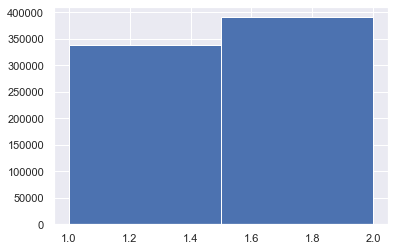

In [30]:
data['vendor_id'].hist(bins=2)

# Bivariate Analysis

Now going to look at the relationship between each of the variables with the target variable trip_duration.

# The relationship between Trip Duration and The day of the week

Text(0.5, 1, 'The Average Trip Duration per Dropoff Day of the week')

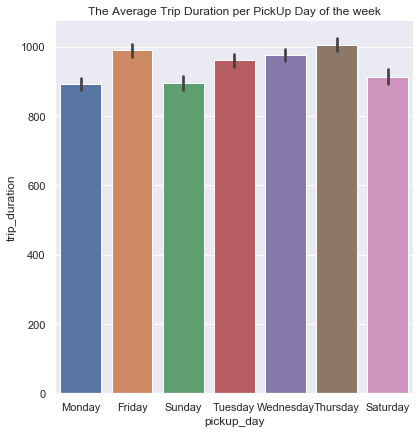

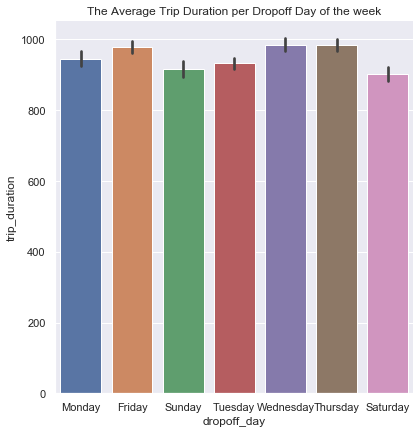

In [31]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=data,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=data,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

The graphs denote the average estimate of a trip for each day of the week.

The highest avg time taken to complete a trip is on Thursday while Monday, Saturday and Sunday takes the least time.

Bt, this is not enough. We must also take into consideration the "Percentage" of short, medium and long trips taken on each day.

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

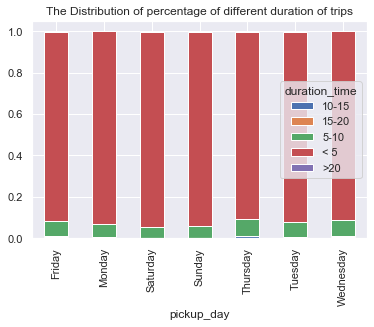

In [32]:
ax1=data.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

The graph shows a percentage distribution of the trips of different duration within each day of the week.  
It does not give much insights as the number of trips within 0–5 hours range is much larger for all the days.  

# Lets look at the percentage of only longer trips (with duration time > 5 hours)

Text(0.5, 1.0, 'A compared distribution of trips > 5 hours')

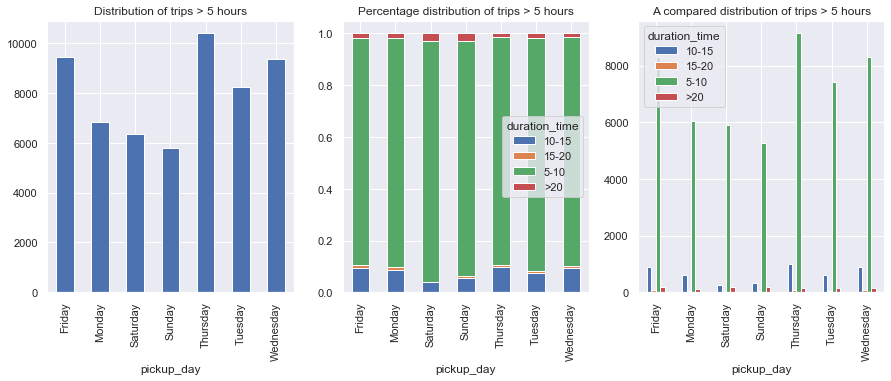

In [33]:
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=data[(data.duration_time !="< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips > 5 hours')
ax2=data[(data.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',ax=ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')
ax3=data[(data.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')

The 3 graphs present 3 types of information here:  
The left most graph shows a frequency distribution of the number of trips greater than 5 hours taken on each day of the week. 

The middle one shows a percentage distribution of the trips of different duration greater than 5 hours within each day of the week.

The right one shows the frequency distribution of the trips of different duration greater than 5 hours)within each day of the week.

Some Noticable Points :  
The most number trips which lasts > 5 hours were taken on Thursday followed by Friday and Wednesday.(Left graph)

But the highest percentage of trips longer than 20 hours was taken on Sunday and Saturday.(middle graph)

The most number of trips of duration 5–10, 10–15 was taken on Thursday.(right graph)

# Relationship between Trip Duration and The time of the day

C:\Users\sumit\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
C:\Users\sumit\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


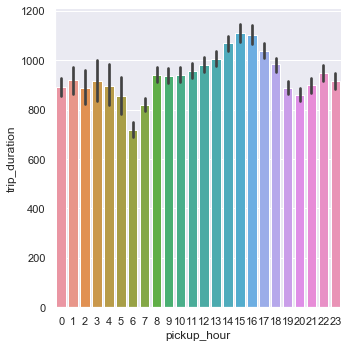

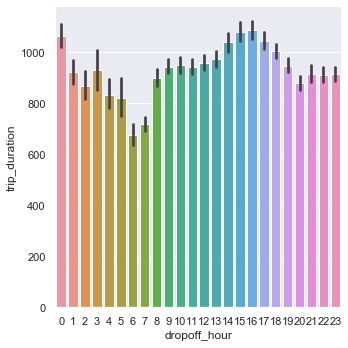

In [34]:
ax=sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=data,ax=ax1)
ax=sns.catplot(x="dropoff_hour", y="trip_duration",kind="bar",data=data,ax=ax2)

The highest average time taken to complete a trip are for trips started in midday(between 14 and 17 hours) and the least are the ones taken in the early morning(between 6–7 hours)

# Relationship between passenger count and duration

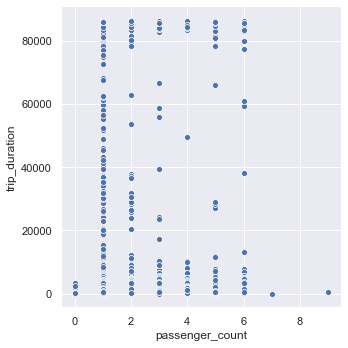

In [35]:
sns.relplot(x="passenger_count", y="trip_duration", data=data, kind="scatter")

As I see, passenger count has no such relationship with trip duration. But it is noted that there are no long trips taken by higher passengers counts like 7 or 9. while the trip duration time is more or less evenly distributed only for passenger count 1.

# Relationship between vendor id and duration

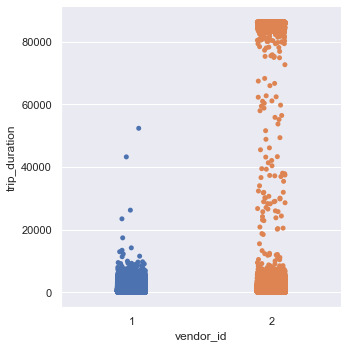

In [36]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=data)

Here we see that vendor 1 mostly provides short trip duration cabs while vendor 2 provides cab for both short and long trips

# Relationship between store forward flag and duration

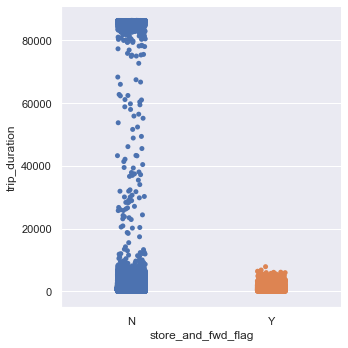

In [37]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=data)

Here, we see the flag was stored only for short duration trips and for long duration trips the flag was never stored.

# Relationship between geographical location and duration

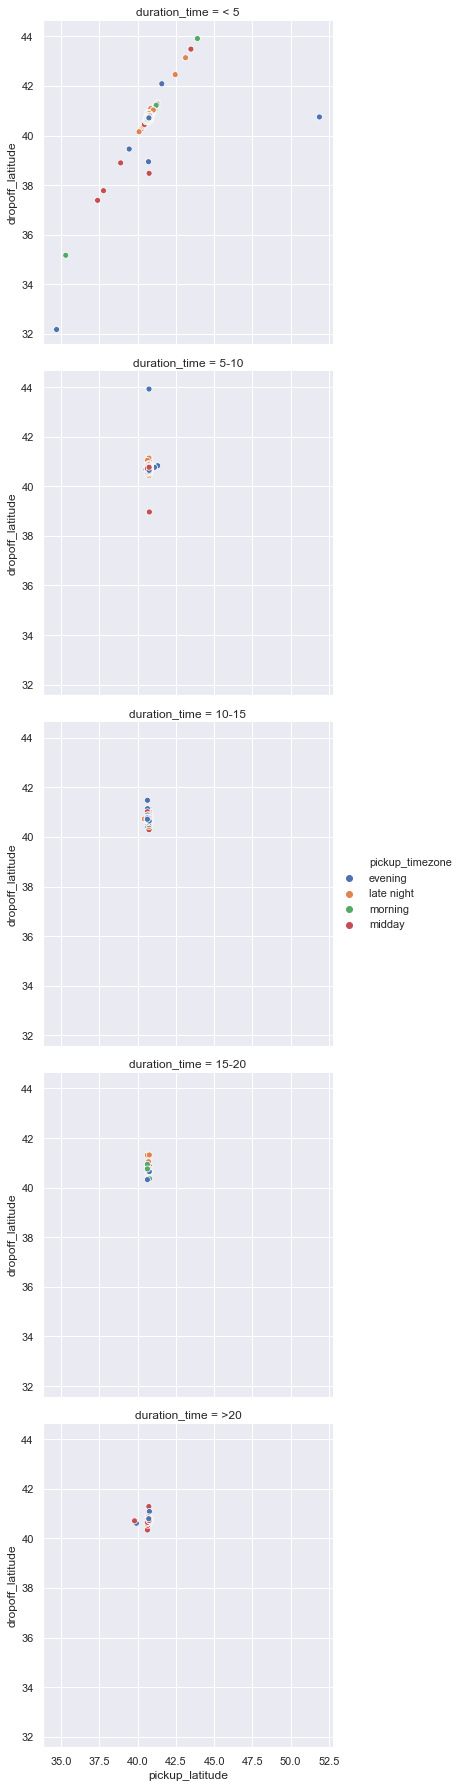

In [38]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',row='duration_time',data=data)

what we see,  
for shorter trips (<5 hours), the pickup and dropoff latitude is more or less evenly distributed between 30 ° and 40 °  
for longer trips(>5 hours ) the pickup and dropoff latitude is all concentrated between 40 ° and 42 ° degrees.

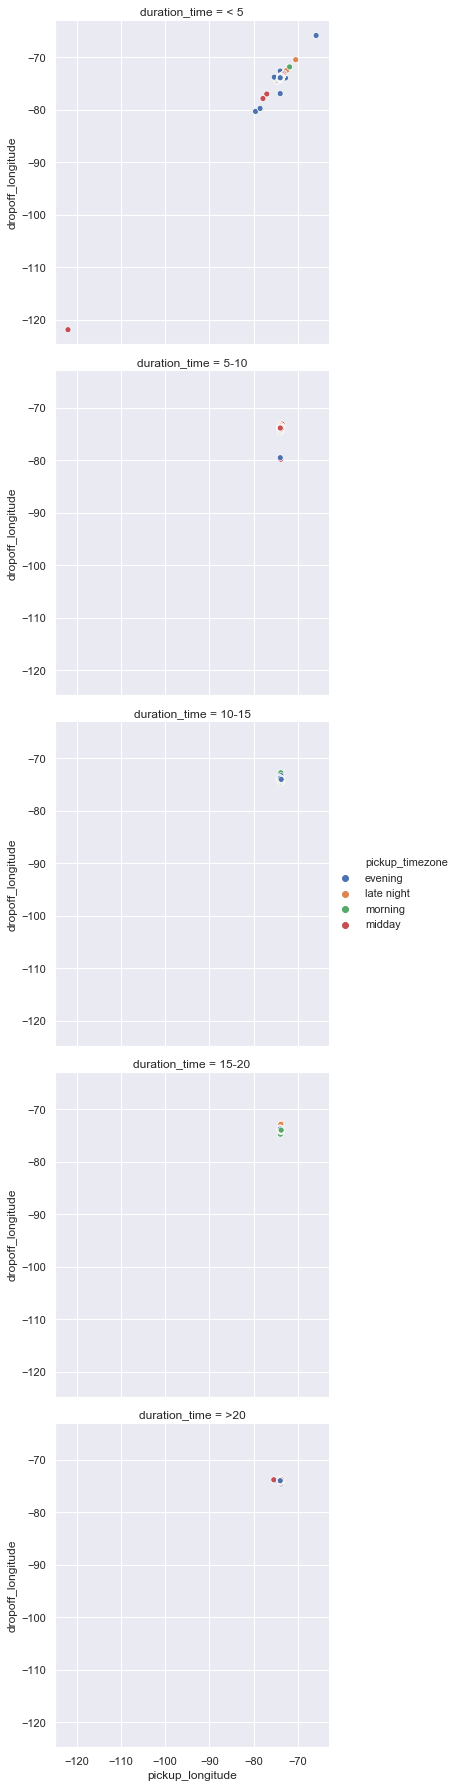

In [39]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude",hue='pickup_timezone',row='duration_time',data=data)

Here’s what we see,  
for shorter trips (<5), the pickup and dropoff longitude is more or less evenly distributed between -80 ° and -65 ° with one outlier near -120 ° .  
for longer trips(>5) the pickup and dropoff longitude is all concentrated near -75 °

# Conclusion about Trip Duration and the data set:

Trip Duration varies a lot ranging from few seconds to more than 20 hours.  
Most trips are taken on Friday , Saturday and Thursday.  
The average duration of a trip is most on Thursday and Friday as trips longer than 5 hours are mostly taken in these days.  
The average duration of trips started in between 14 hours and 17 hours is the largest.  
Vendor 2 mostly provides the longer trips.  
The long duration trips(> 5 hours) are mostly concentrated with their pickup region near (40 °,75 °) to (42°,75°).  